# DATAWIZ 2K21 TASK 2

### By Aditya Medhe

1) Perform data preparation & cleaning
- Handle missing, incorrect and invalid data (if any)
- Perform any additional steps (creating additional columns, merging multiple columns etc. if needed)

2) Perform exploratory analysis & visualization
- Compute the mean, sum, range and other interesting statistics for numeric columns
- Explore distributions of numeric columns using histograms etc.
- Explore relationship between columns using scatter plots, bar charts etc.
- Make a note of interesting insights from the exploratory analysis

3) Ask & answer questions about the data
- Ask at least 5 interesting questions about your dataset
- Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn

4) Summarize your inferences & write a conclusion
- Write a summary of what you've learned from the analysis
- Include interesting insights and graphs from previous sections

### Import some libraries

In [1]:
import math
from pprint import pprint

import numpy as np
import pandas as pd

import seaborn as sns

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Configuring styles
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14

## Step 1: Cleaning and preparing the data

### Define some functions to clean the data

In [3]:
# (42 R), (42), NaN, '', (18.9K R), (18.9K)
def remove_brackets(t):
    text = str(t)
    if len(text) > 2:
        text = text[1:-2].replace(',', '')
        if 'R' in text:
            text = text.split(' ')[0]
        if 'K' in text:
            text = str(float(text[:-2]) * 1000)
    else:
        return np.nan
    if text == '':
        return np.nan
    return int(math.floor(float(text)))

def myround(num, base=0.5, classify=True):
    result = base*round(math.ceil(float(num)/base))
    if classify:
        return str(result-0.4) + ' - ' + str(result)
    return result

### Time to get your hands dirty!

In [4]:
df = pd.read_csv('./zomato_outlet_final.csv')
df.head()

,link,rest_name,rest_type,loc,dine_rating,dine_reviews,delivery_rating,delivery_reviews,cuisine,cost,liked
0,https://www.zomato.com/pune/mix@36-the-westin-...,Mix@36 - The Westin\r\r\n ...,Lounge,"The Westin, Mundhwa",4.2,(707 Reviews),NaN,NaN,"North Indian,Continental,Asian,Finger Food,","Rs. 4,300","Cocktails, Chaat, Beer"
1,https://www.zomato.com/pune/kangan-the-westin-...,Kangan - The Westin\r\r\n ...,Fine Dining,"The Westin, Mundhwa",4.1,(344 Reviews),NaN,NaN,"North Indian,Mughlai,","Rs. 3,500","Biryani, Veg Platter, Dal Makhani, Butter Chic..."
2,https://www.zomato.com/pune/coriander-kitchen-...,Coriander Kitchen - Conrad Pune\r\r\n ...,Fine Dining,"Conrad Pune, Bund Garden Road",4.5,(541 Reviews),NaN,NaN,"Mediterranean,Asian,North Indian,","Rs. 3,200","Pasta, Panipuri, Waffles, Pizza, Salad, Chaat,..."
3,https://www.zomato.com/pune/the-market-the-wes...,The Market - The Westin\r\r\n ...,Fine Dining,"The Westin, Mundhwa",4.0,(55 Reviews),NaN,NaN,"Asian,European,North Indian,","Rs. 3,200","Vanilla Ice Cream, Chaat, Sushi"
4,https://www.zomato.com/pune/vandaag-vivanta-pu...,Vandaag - Vivanta Pune\r\r\n ...,"Pub,Casual Dining","Vivanta Pune, Hinjewadi",3.9,(113 Reviews),NaN,NaN,"Finger Food,Continental,","Rs. 3,100","Cocktails, Beer, Peri Peri Chicken, Fish, Veg ..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5433 entries, 0 to 5432
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   link              5433 non-null   object 
 1   rest_name         5433 non-null   object 
 2   rest_type         4336 non-null   object 
 3   loc               5433 non-null   object 
 4   dine_rating       4829 non-null   float64
 5   dine_reviews      4829 non-null   object 
 6   delivery_rating   2539 non-null   float64
 7   delivery_reviews  2539 non-null   object 
 8   cuisine           5433 non-null   object 
 9   cost              5433 non-null   object 
 10  liked             2603 non-null   object 
dtypes: float64(2), object(9)
memory usage: 467.0+ KB


### Cleaning the data

In [6]:
df.drop(['link'], axis=1, inplace=True)

df['rest_name'] = [word.strip() for word in df['rest_name']]

df['rest_type'].fillna('NaN', inplace=True)

df.rename(columns={'loc': 'location'}, inplace=True)
df['location'] = [word.strip() for word in df['location']]

df['dine_reviews'] = df['dine_reviews'].apply(remove_brackets)
df['dine_reviews'].fillna(0, inplace=True)

df['delivery_reviews'] = df['delivery_reviews'].apply(remove_brackets)
df['delivery_reviews'].fillna(0, inplace=True)

df['cost'] = [int(cost.split(' ')[-1].replace(',', '')) for cost in df['cost']]

df['liked'].fillna('NaN', inplace=True)

df.drop_duplicates(keep='first', inplace=True)

### Defining some variables to use later

In [7]:
REST_TYPES = []
[[REST_TYPES.append(y) for y in x.split(',')] for x in df['rest_type'].value_counts().keys()]
REST_TYPES = set(REST_TYPES)

CUISINES = []
[[CUISINES.append(y.strip()) for y in x.split(',')] for x in df['cuisine'].value_counts().keys()]
CUISINES = set(CUISINES)
CUISINES.remove('')

LOCS = set(df['location'].value_counts().keys())

In [8]:
REST_TYPES_DICT = {}
for rtype in REST_TYPES:
    count = 0
    for raw_rtype in df['rest_type'].value_counts().keys():
        if rtype in raw_rtype:
            count += 1
    REST_TYPES_DICT[rtype] = count

CUISINES_DICT = {}
for ctype in CUISINES:
    count = 0
    for raw_ctype in df['cuisine'].value_counts().keys():
        if ctype in raw_ctype:
            count += 1
    CUISINES_DICT[ctype] = count
    
LOCS_DICT = df['location'].value_counts().to_dict()

In [9]:
REST_TYPES.remove("NaN")
del REST_TYPES_DICT["NaN"]

### Filling NaN values in integer columns 
Filling NaN values in integer columns (dine_rating, delivery_rating) according to the mean of the same restaurants

In [10]:
for rtype in REST_TYPES:
    c3 = df.loc[(df['rest_type'].str.contains(rtype)), 'dine_rating']
    df.loc[(df['rest_type'].str.contains(rtype)), 'dine_rating'].fillna(c3.mean(), inplace=True)
    c4 = df.loc[(df['rest_type'].str.contains(rtype)), 'delivery_rating']
    df.loc[(df['rest_type'].str.contains(rtype)), 'delivery_rating'].fillna(c4.mean(), inplace=True)

df['dine_rating'].fillna(df['dine_rating'].mean(), inplace=True)
df['delivery_rating'].fillna(df['delivery_rating'].mean(), inplace=True)

df['dine_rating'] = df['dine_rating'].apply(round, args=(1,))
df['delivery_rating'] = df['delivery_rating'].apply(round, args=(1,))

### Let's check the data again

In [11]:
df.head()

,rest_name,rest_type,location,dine_rating,dine_reviews,delivery_rating,delivery_reviews,cuisine,cost,liked
0,Mix@36 - The Westin,Lounge,"The Westin, Mundhwa",4.2,707.0,3.8,0.0,"North Indian,Continental,Asian,Finger Food,",4300,"Cocktails, Chaat, Beer"
1,Kangan - The Westin,Fine Dining,"The Westin, Mundhwa",4.1,344.0,3.8,0.0,"North Indian,Mughlai,",3500,"Biryani, Veg Platter, Dal Makhani, Butter Chic..."
2,Coriander Kitchen - Conrad Pune,Fine Dining,"Conrad Pune, Bund Garden Road",4.5,541.0,3.8,0.0,"Mediterranean,Asian,North Indian,",3200,"Pasta, Panipuri, Waffles, Pizza, Salad, Chaat,..."
3,The Market - The Westin,Fine Dining,"The Westin, Mundhwa",4.0,55.0,3.8,0.0,"Asian,European,North Indian,",3200,"Vanilla Ice Cream, Chaat, Sushi"
4,Vandaag - Vivanta Pune,"Pub,Casual Dining","Vivanta Pune, Hinjewadi",3.9,113.0,3.8,0.0,"Finger Food,Continental,",3100,"Cocktails, Beer, Peri Peri Chicken, Fish, Veg ..."


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4929 entries, 0 to 5432
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rest_name         4929 non-null   object 
 1   rest_type         4929 non-null   object 
 2   location          4929 non-null   object 
 3   dine_rating       4929 non-null   float64
 4   dine_reviews      4929 non-null   float64
 5   delivery_rating   4929 non-null   float64
 6   delivery_reviews  4929 non-null   float64
 7   cuisine           4929 non-null   object 
 8   cost              4929 non-null   int64  
 9   liked             4929 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 423.6+ KB


## Step 2: Perform exploratory analysis and visualization

* **Computing statistics like mean, sum, range etc.** 

Maximum, Minimum and Mean cost and dine_rating by cuisine and restaurant type 

In [13]:
cuis_cost = {}
# Print only the first 5 for now
for ctype in sorted(CUISINES)[:5]:
    mx = math.ceil(df.loc[(df['cuisine'].str.contains(ctype))]['cost'].max())
    mn = math.ceil(df.loc[(df['cuisine'].str.contains(ctype))]['cost'].min())
    avg = math.ceil(df.loc[(df['cuisine'].str.contains(ctype))]['cost'].mean())
    cuis_cost[ctype] = (avg, mn, mx)
print("Costs sorted by cuisine")
print("Cuisine--Average--Minimum--Maximum")
pprint(cuis_cost)

Costs sorted by cuisine
Cuisine--Average--Minimum--Maximum
{'Afghan': (650, 500, 750),
 'African': (1600, 1600, 1600),
 'American': (814, 300, 2500),
 'Andhra': (634, 400, 700),
 'Arabian': (508, 250, 1000)}


In [14]:
rest_cost = {}
# Print only the first 5 for now
for rtype in sorted(REST_TYPES)[:5]:
    if rtype == 'NaN':
        continue
    mx = math.ceil(df.loc[(df['rest_type'].str.contains(rtype))]['cost'].max())
    mn = math.ceil(df.loc[(df['rest_type'].str.contains(rtype))]['cost'].min())
    avg = math.ceil(df.loc[(df['rest_type'].str.contains(rtype))]['cost'].mean())
    rest_cost[rtype] = (avg, mn, mx)
print("Costs sorted by restaurant type")
print("Restaurant Type--Average--Minimum--Maximum")
pprint(rest_cost)

Costs sorted by restaurant type
Restaurant Type--Average--Minimum--Maximum
{'Bakery': (360, 100, 1500),
 'Bar': (1414, 600, 3000),
 'Beverage Shop': (247, 50, 600),
 'Bhojanalya': (275, 250, 300),
 'Café': (633, 100, 2000)}


In [15]:
cuis_rate = {}
# Print only the first 5 for now
for ctype in sorted(CUISINES)[:5]:
    mx = round(df.loc[(df['cuisine'].str.contains(ctype))]['dine_rating'].max(), 1)
    mn = round(df.loc[(df['cuisine'].str.contains(ctype))]['dine_rating'].min(), 1)
    avg = round(df.loc[(df['cuisine'].str.contains(ctype))]['dine_rating'].mean(), 1)
    cuis_rate[ctype] = (avg, mn, mx)
print("Dining ratings sorted by cuisine")
print("Cuisine--Average--Minimum--Maximum")
pprint(cuis_rate)

Dining ratings sorted by cuisine
Cuisine--Average--Minimum--Maximum
{'Afghan': (3.9, 3.4, 4.3),
 'African': (3.9, 3.9, 3.9),
 'American': (3.7, 2.6, 4.8),
 'Andhra': (3.7, 3.1, 4.0),
 'Arabian': (3.8, 3.4, 4.3)}


In [16]:
rest_rate = {}
# Print only the first 5 for now
for rtype in sorted(REST_TYPES)[:5]:
    if rtype == 'NaN':
        continue
    mx = round(df.loc[(df['rest_type'].str.contains(rtype))]['dine_rating'].max(), 1)
    mn = round(df.loc[(df['rest_type'].str.contains(rtype))]['dine_rating'].min(), 1)
    avg = round(df.loc[(df['rest_type'].str.contains(rtype))]['dine_rating'].mean(), 1)
    rest_rate[rtype] = (avg, mn, mx)
print("Dining ratings sorted by restaurant types")
print("Restaurant Type--Average--Minimum--Maximum")
pprint(rest_rate)

Dining ratings sorted by restaurant types
Restaurant Type--Average--Minimum--Maximum
{'Bakery': (3.5, 2.2, 4.9),
 'Bar': (3.8, 2.0, 4.9),
 'Beverage Shop': (3.5, 2.7, 4.5),
 'Bhojanalya': (3.4, 3.2, 3.5),
 'Café': (3.5, 2.0, 4.9)}


* **Explore distributions of numeric columns using histograms**

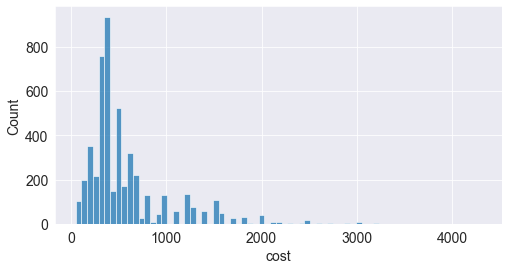

In [17]:
plt.rcParams["figure.figsize"] = (8,4)
sns.histplot(df, x='cost', binwidth=60);

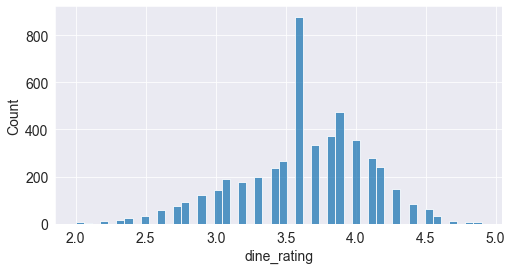

In [18]:
plt.rcParams["figure.figsize"] = (8,4)
sns.histplot(df, x='dine_rating');

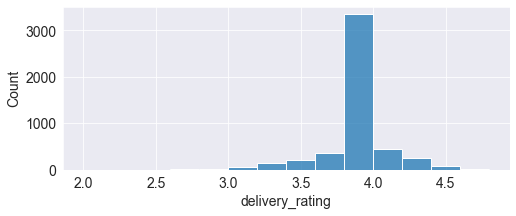

In [19]:
plt.rcParams["figure.figsize"] = (8,3)
sns.histplot(df, x='delivery_rating');

In [20]:
plt.rcParams["figure.figsize"] = (7, 4.8)

* **Explore relationship between columns using scatter plots, bar charts etc.**

Average Cost per Cuisine in relation with the dine_rating

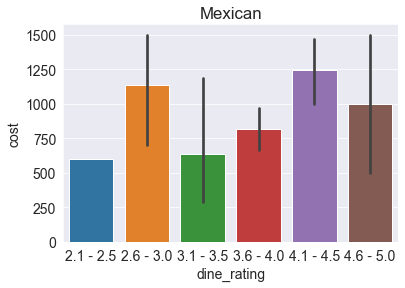

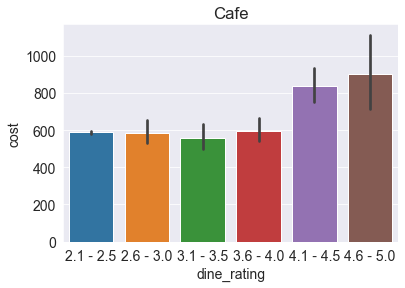

In [18]:
# Plot only the first two for now
for ctype in list(CUISINES)[:2]:
    x = df.loc[(df['cuisine'].str.contains(ctype)), 'dine_rating']
    y1 = df.loc[(df['cuisine'].str.contains(ctype)), 'cost']
    x = x.apply(myround, args=(0.5,))
    order = [myround(i/10) for i in range(25, 51, 5)]

    plt.title(ctype)
    sns.barplot(x=x, y=y1, order=order)
    plt.show()

Average Cost per Restaurant type in relation with the dine_rating

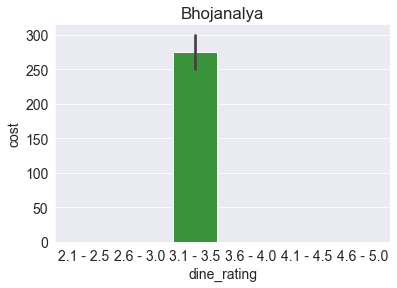

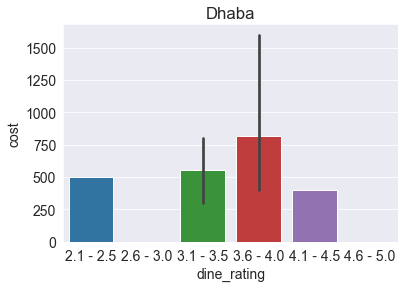

In [19]:
# Plot only the first two for now
for rtype in list(REST_TYPES)[:2]:
    x = df.loc[(df['rest_type'].str.contains(rtype)), 'dine_rating']
    y1 = df.loc[(df['rest_type'].str.contains(rtype)), 'cost']
    x = x.apply(myround, args=(0.5,))
    order = [myround(i/10) for i in range(25, 51, 5)]

    plt.title(rtype)
    sns.barplot(x=x, y=y1, order=order)
    plt.show()

- Range of cost sorted by restaurant type <br>
Here we make use of a boxplot to plot the average, minimum and maximum costs of restaurant types to clearly show the range of prices.

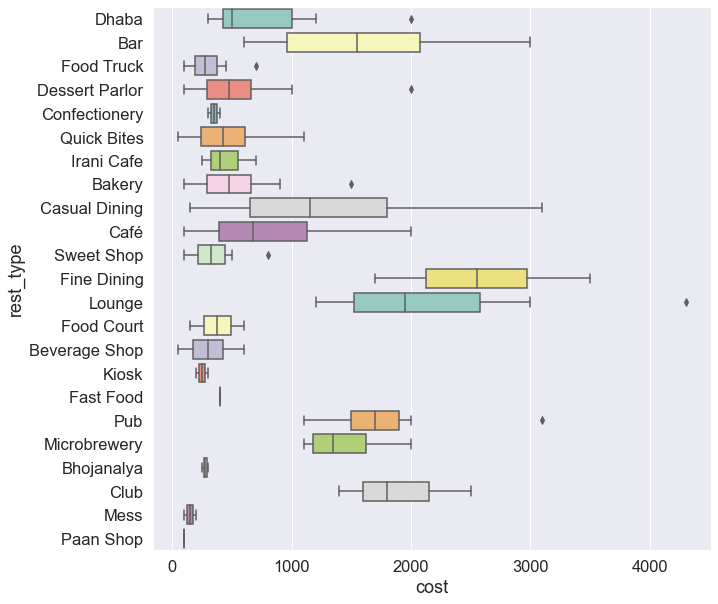

In [23]:
plt.rcParams["figure.figsize"] = (10,10)


REST_TYPES = list(REST_TYPES)
x = df.loc[(df['rest_type'].str.contains(REST_TYPES[0])), 'cost'].to_frame()
y = df.loc[(df['rest_type'].str.contains(REST_TYPES[0])), 'rest_type'].to_frame()
y = pd.DataFrame({"rest_type": [REST_TYPES[0] for i in range(len(y))]}, index=y.index)

for rtype in REST_TYPES[1:]:
    dx = df.loc[(df['rest_type'].str.contains(rtype)), 'cost'].to_frame()
    dy = df.loc[(df['rest_type'].str.contains(rtype)), 'rest_type'].to_frame()
    dy = pd.DataFrame({"rest_type": [rtype for i in range(len(dy))]}, index=dy.index)
    x = pd.concat([x, dx], axis=0)
    y = pd.concat([y, dy], axis=0)

xy = x.merge(y, how='inner', on=x.index)
xy.set_index('key_0', inplace=True)
xy.drop_duplicates(keep='first', inplace=True)
sns.set(font_scale=1.5)
ax = sns.boxplot(x='cost',
                 y='rest_type',
                 data=xy,
                 palette='Set3')
plt.show()

- Range of cost sorted by cuisine <br>
Here we make use of a boxplot to plot the average, minimum and maximum costs of cuisines to clearly show the range of prices.

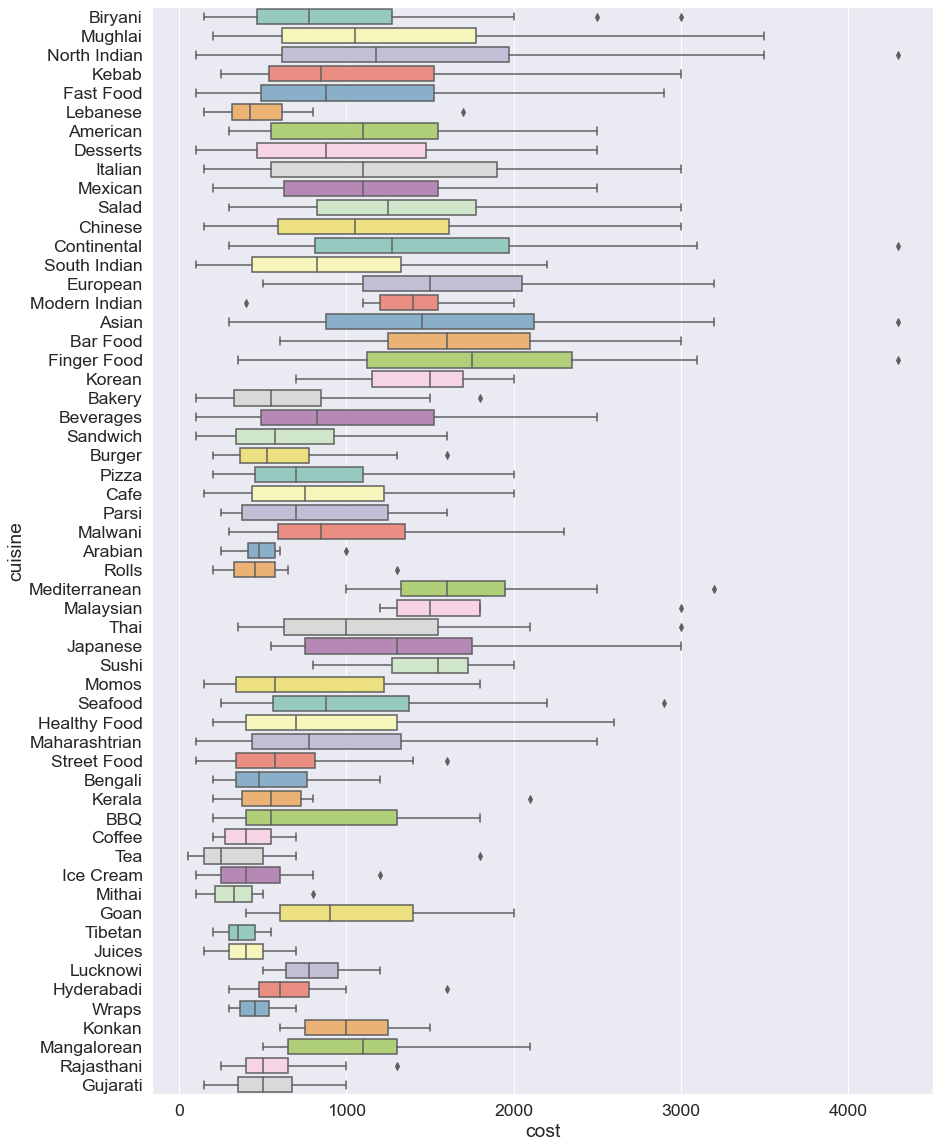

In [24]:
plt.rcParams["figure.figsize"] = (14, 20)

CUISINES = sorted(list(CUISINES))
x = df.loc[(df['cuisine'].str.contains(CUISINES[0])), 'cost'].to_frame()
y = df.loc[(df['cuisine'].str.contains(CUISINES[0])), 'cuisine'].to_frame()
y = pd.DataFrame({"location": [CUISINES[0] for i in range(len(y))]}, index=y.index)

for ctype in CUISINES[1:]:
    if not CUISINES_DICT[ctype] > 5:
        continue
    dx = df.loc[(df['cuisine'].str.contains(ctype)), 'cost'].to_frame()
    dy = df.loc[(df['cuisine'].str.contains(ctype)), 'cuisine'].to_frame()
    dy = pd.DataFrame({"cuisine": [ctype for i in range(len(dy))]}, index=dy.index)
    x = pd.concat([x, dx], axis=0)
    y = pd.concat([y, dy], axis=0)

xy = x.merge(y, how='inner', on=x.index)
xy.set_index('key_0', inplace=True)
xy.drop_duplicates(keep='first', inplace=True)
sns.set(font_scale=1.6)
ax = sns.boxplot(x='cost',
                 y='cuisine',
                 data=xy,
                 palette='Set3')
plt.show()

### **Let's look at some geospatial data**

Using GeoPy and the Google Geocoding API, we can get the coordinates of each hotel with significant accuracy.
We can then plot these points on a map with Folium

In [25]:
import json

# from geopy import GoogleV3

import folium
from folium.plugins import HeatMap

In [26]:
geodata = {}


# We use the GoogleV3 class of GeoPy with an API key that has to be generated on https://console.cloud.google.com/
# Too many requests to the Google API can cost you money.
# To avoid sharing my API key I previously ran this code and have stored the coordinates in a json file.


# geolocator = GoogleV3(api_key="API_KEY", domain="maps.google.co.in")
# for index, row in df.iterrows():
#     place = row['rest_name'] + ' ' + row['location']
#     location = geolocator.geocode(place)[1]
#     geodata[place] = location

# with open('geodata.json', 'w') as f:
#     json.dump(geodata, f)

with open('geodata.json', 'r') as f:
    geodata = json.load(f)

#### Disclaimer: There are some locations which have been shown outside Pune in the maps. They have incorrect coordinates as getting coordinates from incomplete addresses is bound to fail sometimes.

In [27]:
maph = folium.Map(location=(18.5204, 73.8567),
                  zoom_start=11,
                  min_zoom=5)
base_map = folium.FeatureGroup(name='Basemap', overlay=True, control=False)
folium.TileLayer(tiles='OpenStreetMap').add_to(base_map)

base_map.add_to(maph)

Let's look at the most common locations mentioned in the dataset via a heatmap

In [28]:
hm = HeatMap(geodata.values(), min_opacity=0.15)
hm.add_to(maph)

In [29]:
maph

* **Make a note of interesting insights from the exploratory analysis**

- Through the heatmap we can see that apart from Pune, some restaurants from **Lavasa** and **Lonavala** are also included to be in the Pune section of Zomato

In [30]:
df.loc[(df['location'].str.contains('Lavasa')) | (df['location'].str.contains('Lonavala'))].shape

(52, 10)

We can also see that there are three major locations in Pune where restaurants are denser than the rest:
**Viman Nagar**, **Erandwana** and **Baner**

In [31]:
([k for k,v in zip(cuis_cost.keys(), cuis_cost.values()) if v[0] == max([val[0] for val in cuis_cost.values()])],
[k for k,v in zip(cuis_cost.keys(), cuis_cost.values()) if v[0] == min([val[0] for val in cuis_cost.values()])])

(['Greek'], ['Paan'])

- On average the most expensive cuisine is **Greek** while the cheapest one is **Paan**

In [32]:
([k for k,v in zip(rest_cost.keys(), rest_cost.values()) if v[0] == max([val[0] for val in rest_cost.values()])],
[k for k,v in zip(rest_cost.keys(), rest_cost.values()) if v[0] == min([val[0] for val in rest_cost.values()])])

(['Fine Dining'], ['Paan Shop'])

- On average the costliest restaurants are **Fine Dining** while the least expensive are **Paan Shops**

## Step 3: Ask and answer questions about the data

### 1.  What is the second most expensive restaurant in Pune that has a cuisine of Pizza and a dine_rating of less than 4.2?

In [33]:
ans1 = df.loc[(df['cuisine'].str.contains('Pizza')) & (df['dine_rating'] < 4.2)].sort_values(by='cost', ascending=False).iloc[1]
place = ans1['rest_name'] + ' ' + ans1['location']
map1 = folium.Map(location=(18.5204, 73.8567),
                  zoom_start=12,
                  min_zoom=5)
folium.Marker(geodata[place], tooltip="Answer 1", popup=place).add_to(map1)
print(ans1)
map1

rest_name                                                     Tahelka
rest_type                                           Bar,Casual Dining
location                                                Pimple Nilakh
dine_rating                                                       4.1
dine_reviews                                                    329.0
delivery_rating                                                   3.8
delivery_reviews                                                  0.0
cuisine             Desserts,Pizza,Seafood,Chinese,Asian,Continent...
cost                                                             1300
liked               Tikka, Stuffed Mushroom, Butter Chicken, Chees...
Name: 426, dtype: object


### 2.  List the top 25 restaurants according to delivery ratings. What is the most common cuisine from them?

In [34]:
ans2 = df.loc[(df['delivery_rating'] >= df['delivery_rating'].sort_values(ascending=False)[:25].iloc[-1])][:25]

In [35]:
ans2.head()

,rest_name,rest_type,location,dine_rating,dine_reviews,delivery_rating,delivery_reviews,cuisine,cost,liked
58,Effingut,Pub,Baner,4.7,289.0,4.5,64.0,"Asian,Italian,Mughlai,North Indian,Continental,",2000,"Apple Cider, Craft Beer, Nachos, Cocktails, Bu..."
63,Little Italy,"Casual Dining,Bar",Shivaji Nagar,4.5,269.0,4.5,84.0,"Beverages,Mexican,Italian,",1500,"Pasta, Pizza, Nachos, Tiramisu, Lasagne, Salad..."
111,Mainland China,"Casual Dining,Bar",Senapati Bapat Road,4.5,134.0,4.5,55.0,"Thai,Japanese,Momos,Sushi,Asian,Chinese,",1800,"Dumplings, Fish, Mocktails, T'sing Hoi Chicken..."
465,Chinese Room,Casual Dining,East Street,4.3,85.0,4.5,76.0,"Bar Food,Seafood,Asian,Thai,Chinese,",1200,"Noodle, Cocktails, Hakka Noodles, Brownie, Van..."
772,Vaishali,Casual Dining,FC Road,4.5,574.0,4.6,956.0,"Beverages,Fast Food,Sandwich,South Indian,",500,"Mysore Masala Dosa, Filtered Coffee, Idli, Upm..."


In [36]:
a2_CUISINES = []
[[a2_CUISINES.append(y.strip()) for y in x.split(',')] for x in ans2['cuisine'].value_counts().keys()]
a2_CUISINES = set(a2_CUISINES)
a2_CUISINES.remove('')
a2_CUISINES_DICT = {}
for ctype in a2_CUISINES:
    count = 0
    for raw_ctype in ans2['cuisine'].value_counts().keys():
        if ctype in raw_ctype:
            count += 1
    a2_CUISINES_DICT[ctype] = count

In [37]:
max(zip(a2_CUISINES_DICT.values(), a2_CUISINES_DICT.keys()))

(5, 'Desserts')

Thus the most common cuisine from them is **Desserts**

In [38]:
map2 = folium.Map(location=(18.5204, 73.8567),
                  zoom_start=11,
                  min_zoom=5)
for index, row in ans2.iterrows():
    place = row['rest_name'] + ' ' + row['location']
    folium.Marker(geodata[place], tooltip=place, popup=place).add_to(map2)

map2

### 3.  How many bakeries are there in 'Kothrud' ?

In [39]:
bakery = df.loc[(df['rest_type'].str.contains('Bakery')) | (df['cuisine'].str.contains('Bakery'))]
ans3 = bakery.loc[(bakery['location'].str.contains('Kothrud'))]
ans3.head()

,rest_name,rest_type,location,dine_rating,dine_reviews,delivery_rating,delivery_reviews,cuisine,cost,liked
847,Theobroma,Bakery,Kothrud,3.8,6.0,4.5,28.0,"Beverages,Fast Food,Desserts,Bakery,",900,NaN
1690,Cake Cart,Dessert Parlor,Kothrud,4.0,10.0,4.4,22.0,"Bakery,",250,"Chips, Dutch Truffle"
1737,Midnight Kakery,Bakery,Kothrud,4.2,17.0,4.8,12.0,"Fast Food,Desserts,Bakery,",300,"Macaroon, Tiramisu, Cupcake, Coffee, Red Velve..."
1993,Baker's Basket,"Bakery,Quick Bites",Kothrud,3.9,8.0,4.3,20.0,"Fast Food,Desserts,Bakery,",400,"Chocolate Cake, Pineapple Cake"
2122,Bon Bon Candy Cake Shop,Bakery,Kothrud,3.7,71.0,3.8,0.0,"Desserts,Bakery,",500,"Blackforest Cake, Red Velvet Cake"


In [40]:
ans3.shape

(20, 10)

Thus there are **20** bakeries in 'Kothrud'

In [41]:
map3 = folium.Map(location=(18.5204, 73.8567),
                  zoom_start=13,
                  min_zoom=5)
for index, row in ans3.iterrows():
    place = row['rest_name'] + ' ' + row['location']
    folium.Marker(geodata[place], tooltip=place, popup=place).add_to(map3)

map3

### 4.  What is the most liked dish in Fine Dining restaurants and what other restaurants than these serve the dishes?

In [42]:
ans4 = df.loc[(df['rest_type'].str.contains('Fine Dining'))]

In [43]:
a4_LIKED = []
[[a4_LIKED.append(y.strip()) for y in x.split(',')] for x in ans4['liked'].value_counts().keys()]
a4_LIKED = set(a4_LIKED)
a4_LIKED_DICT = {}
for ltype in a4_LIKED:
    count = 0
    for raw_ltype in ans4['liked'].value_counts().keys():
        if ltype in raw_ltype:
            count += 1
    a4_LIKED_DICT[ltype] = count

In [44]:
max(zip(a4_LIKED_DICT.values(), a4_LIKED_DICT.keys()))

(13, 'Salad')

Thus the most liked dish in Fine Dining restaurants is **Salad**

In [45]:
other_rest = df.loc[(~df['rest_type'].str.contains('Fine Dining')) & (df['liked'].str.contains('Salad'))]

In [46]:
other_rest.head()

,rest_name,rest_type,location,dine_rating,dine_reviews,delivery_rating,delivery_reviews,cuisine,cost,liked
22,Evviva Sky Lounge - Crowne Plaza Pune City Centre,Lounge,"Crowne Plaza Pune City Centre, Bund Garden Road",4.3,744.0,3.8,0.0,"Mexican,Kebab,Bar Food,",2500,"Cocktails, Paneer Tikka, Nachos, Paratha, Moji..."
23,Mosaic - Crowne Plaza Pune City Centre,Casual Dining,"Crowne Plaza Pune City Centre, Bund Garden Road",4.1,294.0,3.8,0.0,"Fast Food,North Indian,",2500,"Roti, Salad, Chai, Dahi Vada, Coffee, Paratha,..."
30,Euriska,"Lounge,Casual Dining",Mundhwa,4.2,1088.0,3.8,0.0,"Salad,Greek,Mediterranean,Italian,Finger Food,",2500,"Cocktails, Salad, Pizza, Mocktails, Baklava, P..."
38,Boteco - Restaurante Brasileiro,"Casual Dining,Bar",Koregaon Park,4.8,76.0,4.1,49.0,"South American,Steak,Brazilian,",2300,"Cocktails, Steak, Profiterole, Pork Momo, Lamb..."
40,Buzz - Vivanta Pune,Casual Dining,"Vivanta Pune, Hinjewadi",4.3,456.0,3.8,0.0,"Beverages,Fast Food,Mughlai,Continental,Italia...",2300,"Salad, Pizza, Mocktails, Pasta, Noodle, Chicke..."


In [47]:
other_rest.shape

(219, 10)

In [48]:
map4 = folium.Map(location=(18.5204, 73.8567),
                  zoom_start=11,
                  min_zoom=5)
for index, row in other_rest.iterrows():
    place = row['rest_name'] + ' ' + row['location']
    try:
        folium.Marker(geodata[place], tooltip=place, popup=place).add_to(map4)
    except:
        pass

map4

### 5. What is the most common restaurant chain in Pune? How many branches does it have?

In [49]:
df['rest_name'].value_counts().keys()[0], df['rest_name'].value_counts()[0]

('Monginis', 74)

Thus the most common restaurant chain in Pune is **Monginis** and it has **74** branches

In [50]:
ans5 = df.loc[(df['rest_name'].str.contains('Monginis'))]
ans5.head()

,rest_name,rest_type,location,dine_rating,dine_reviews,delivery_rating,delivery_reviews,cuisine,cost,liked
3051,Monginis,"Bakery,Dessert Parlor",Wakad,4.4,85.0,3.8,0.0,"Bakery,",300,NaN
3057,Monginis,Bakery,Kharadi,2.7,0.0,3.9,6.0,"Bakery,",300,NaN
3058,Monginis,"Bakery,Dessert Parlor",Dhankawadi,3.6,80.0,3.8,0.0,"Bakery,",300,NaN
3059,Monginis,Bakery,Khadki,2.7,19.0,3.8,0.0,"Bakery,",300,NaN
3060,Monginis,"Bakery,Dessert Parlor",Dange Chowk,3.6,22.0,3.8,0.0,"Bakery,",300,NaN


In [51]:
map5 = folium.Map(location=(18.5204, 73.8567),
                  zoom_start=11,
                  min_zoom=5)
for index, row in ans5.iterrows():
    place = row['rest_name'] + ' ' + row['location']
    folium.Marker(geodata[place], tooltip=place, popup=place).add_to(map5)

map5

### 6.  Where are the top 25 most expensive restaurants located?

In [52]:
ans6 = df.loc[(df['cost'] >= df['cost'].sort_values(ascending=False)[:25].iloc[-1])][:25]

In [53]:
ans6.head()

,rest_name,rest_type,location,dine_rating,dine_reviews,delivery_rating,delivery_reviews,cuisine,cost,liked
0,Mix@36 - The Westin,Lounge,"The Westin, Mundhwa",4.2,707.0,3.8,0.0,"North Indian,Continental,Asian,Finger Food,",4300,"Cocktails, Chaat, Beer"
1,Kangan - The Westin,Fine Dining,"The Westin, Mundhwa",4.1,344.0,3.8,0.0,"North Indian,Mughlai,",3500,"Biryani, Veg Platter, Dal Makhani, Butter Chic..."
2,Coriander Kitchen - Conrad Pune,Fine Dining,"Conrad Pune, Bund Garden Road",4.5,541.0,3.8,0.0,"Mediterranean,Asian,North Indian,",3200,"Pasta, Panipuri, Waffles, Pizza, Salad, Chaat,..."
3,The Market - The Westin,Fine Dining,"The Westin, Mundhwa",4.0,55.0,3.8,0.0,"Asian,European,North Indian,",3200,"Vanilla Ice Cream, Chaat, Sushi"
4,Vandaag - Vivanta Pune,"Pub,Casual Dining","Vivanta Pune, Hinjewadi",3.9,113.0,3.8,0.0,"Finger Food,Continental,",3100,"Cocktails, Beer, Peri Peri Chicken, Fish, Veg ..."


In [54]:
map6 = folium.Map(location=(18.5204, 73.8567),
                  zoom_start=12,
                  min_zoom=5)
for index, row in ans6.iterrows():
    place = row['rest_name'] + ' ' + row['location']
    folium.Marker(geodata[place], tooltip=place, popup=place).add_to(map6)

map6

## Step 4: Summarize your inferences and write your conclusion

The primary objective of this task was to analyze and visualize data collected from the Zomato Pune Restaurants database. This data, being a real life dataset, was filled with inconsistencies and fallacies. <br>
It was upto the student to take care of all the rough edges and polish and clean the data. Some steps required were dropping redundant columns, stripping whitespace, converting appropriate strings to integers, filling NaN with suitable methods and more. <br>

This cultivated and clarified the student's knowledge of the pandas library.

As per the data that was parsed and calculated we saw the average, minimum and maximum costs and ratings of the restaurants in the dataset.

The costliest restaurant is **Mix@36 - The Westin** starting at Rs. **4300**. <br>
The costliest cuisine is **Greek** and the costliest restaurant type is **Fine Dining**
 <br>
The cheapest restaurants are **Yewale Amruttulya** starting at Rs. **50**. <br>
The cheapest cuisine is **Paan** and the cheapest restaurant type is **Paan Shop**

The best rated restaurants for dine in are **The French Window Patisserie, Sante Spa Cuisine, Le Plaisir, Savya Rasa, Le Flemington and Gong** all with a rating of **4.9**. <br>
The best rated cuisine for dine in is **South American** and the best rated restaurant type for dine in is **Paan Shop**.
 <br>
The worst rated restaurant for dine in is **Kobe Sizzlers, Cafe Coffee Day Koturud, Govind Garden, Roll King, Dragon, Shivar Garden, Toni Daa Dhaba, Smokin Joe's Viman Nagar and Up and Above** all with a rating of **2.0**. <br>
The worst rated cuisine for dine in is **Assamese** and the worst rated restaurant type for dine in is **Bhojanalya**

The best rated restaurants for delivery are **Midnight Kakery** all with a rating of **4.8**. <br>
The best rated cuisine for delivery is **Burmese** and the best rated restaurant type for delivery is **Confectionery**
 <br>
The worst rated restaurant for delivery is **Swad E Hyderabadi** with a rating of **2.0**. <br>
The worst rated cuisine for delivery is **Assamese** and the worst rated restaurant type for delivery is **Food Court**

We can also see that there are three major locations in Pune where restaurants are denser than the rest:
**Viman Nagar**, **Erandwana** and **Baner**